In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

Complete attribute documentation: 
    1 id: patient identification number 
    2 ccf: social security number (I replaced this with a dummy value of 0)
    3 age: age in years 
    4 sex: sex (1 = male; 0 = female) 
    5 painloc: chest pain location (1 = substernal; 0 = otherwise) 
    6 painexer (1 = provoked by exertion; 0 = otherwise) 
    7 relrest (1 = relieved after rest; 0 = otherwise) 
    8 pncaden (sum of 5, 6, and 7) 
    9 cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 
    10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
    11 htn 
    12 chol: serum cholestoral in mg/dl
    13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker) 
    14 cigs (cigarettes per day) 
    15 years (number of years as a smoker) 
    16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    17 dm (1 = history of diabetes; 0 = no such history) 
    18 famhist: family history of coronary artery disease (1 = yes; 0 = no) 
    19 restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    20 ekgmo (month of exercise ECG reading) 
    21 ekgday(day of exercise ECG reading) 
    22 ekgyr (year of exercise ECG reading) 
    23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no) 
    24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no) 
    25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no) 
    26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no) 
    27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no) 
    28 proto: exercise protocolage sex chest pain type (4 values) resting blood pressure serum cholestoral in mg/dl fasting blood sugar > 120 mg/dl resting electrocardiographic results (values 0,1,2) maximum heart rate achieved exercise induced angina oldpeak = ST depression induced by exercise relative to rest the slope of the peak exercise ST segment number of major vessels (0-3) colored by flourosopy thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
cps=pd.get_dummies(df['cp']).rename(columns={0:'cp_1',1:'cp_2',2:'cp_3',3:'cp_4'})

In [6]:
cps

,cp_1,cp_2,cp_3,cp_4
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0
6,0,1,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


In [7]:
df = pd.concat([df,cps],axis=1)
df.drop('cp',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [8]:
thals=pd.get_dummies(df['thal']).rename(columns={0:'th_1',1:'th_2',2:'th_3',3:'th_4'})

In [9]:
thals

,th_1,th_2,th_3,th_4
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,0,0,0,1
9,0,0,1,0


In [10]:
df = pd.concat([df,thals],axis=1)
df.drop('thal',axis=1,inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,cp_4,th_1,th_2,th_3,th_4
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,1,0,0,0,0,0,1,0


In [11]:
x = df.drop('target',axis=1)
y=df['target']

In [12]:
x.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,th_1,th_2,th_3,th_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.471947,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.500038,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
x_sc = pd.DataFrame(StandardScaler().fit_transform(x),columns=x.columns)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
age         303 non-null int64
sex         303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
target      303 non-null int64
cp_1        303 non-null uint8
cp_2        303 non-null uint8
cp_3        303 non-null uint8
cp_4        303 non-null uint8
th_1        303 non-null uint8
th_2        303 non-null uint8
th_3        303 non-null uint8
th_4        303 non-null uint8
dtypes: float64(1), int64(11), uint8(8)
memory usage: 30.9 KB


In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size=0.3,random_state=101)

In [17]:
model = KNeighborsClassifier().fit(xtrain,ytrain)

In [18]:
model.score(xtest,ytest)

0.7802197802197802

In [19]:
model.score(xtrain,ytrain)

0.8820754716981132

In [20]:
scores = []
for i in range(3,31):
    model_i = KNeighborsClassifier(n_neighbors=i).fit(xtrain,ytrain)
    scores.append(model_i.score(xtest,ytest))

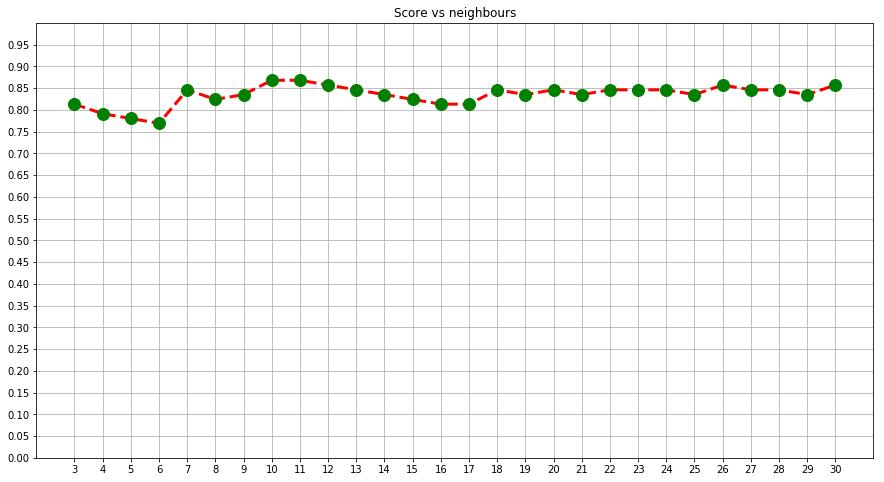

In [21]:
plt.figure(figsize=(15,8))
plt.plot(range(3,31),scores, color='r',linestyle='--',lw=3,marker='o',markerfacecolor='green',markeredgecolor='green',markersize=12)
plt.xticks(range(3,31))
plt.ylim([0,1])
plt.yticks(np.arange(0.0,1.0,0.05))
plt.title('Score vs neighbours')
plt.grid()

In [22]:
model_knn = KNeighborsClassifier(n_neighbors=11).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [23]:
from sklearn.svm import SVC

In [24]:
model_svc = SVC().fit(xtrain,ytrain)
print(round(model_svc.score(xtest,ytest)*100,2),'%')

83.52 %


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
print(round(model_rf.score(xtest,ytest)*100,2),'%')

75.82 %


In [27]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,y,test_size=0.3, random_state=101)

In [28]:
model_rf1 = RandomForestClassifier().fit(xtrain1,ytrain1)
print(round(model_rf1.score(xtest1,ytest1)*100,2),'%')

83.52 %


In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
model_bag = BaggingClassifier(DecisionTreeClassifier(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag.score(xtest,ytest)*100,2),'%')

80.22 %


In [31]:
model_bag2 = BaggingClassifier(SVC(),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag2.score(xtest,ytest)*100,2),'%')

83.52 %


In [32]:
model_bag3 = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=20).fit(xtrain,ytrain)
print(round(model_bag3.score(xtest,ytest)*100,2),'%')

83.52 %


In [33]:
! pip install xgboost

In [34]:
import xgboost as xgb

In [35]:
model_xgb = xgb.XGBClassifier().fit(xtrain,ytrain)

[18:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
print(round(model_xgb.score(xtest,ytest)*100,2),'%')

80.22 %


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model_legit = LogisticRegression().fit(xtrain,ytrain)
print(round(model_legit.score(xtest,ytest)*100,2),'%')

84.62 %


In [40]:
model_knn= KNeighborsClassifier(n_neighbors=10).fit(xtrain,ytrain)
print(round(model_knn.score(xtest,ytest)*100,2),'%')

86.81 %


In [41]:
pd.to_pickle(model_knn,'Heart.pkl')

In [42]:
m=pd.read_pickle('Heart.pkl')

In [43]:
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,th_1,th_2,th_3,th_4
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,0,1,0,0,0,0,0,1,0


In [47]:

age=eval(input('Enter your age'))
sex=eval(input('Enter your sex'))
trestbps=eval(input('Enter your trestbps'))
chol=eval(input('Enter your chol'))
fbs=eval(input('Enter your fbs'))
restecg=eval(input('Enter your restecg'))
thalach=eval(input('Enter your thalach'))
exang=eval(input('Enter your exang'))
oldpeak=eval(input('Enter your oldpeak'))
slope=eval(input('Enter your slop'))
ca=eval(input('Enter your ca'))
cp_1=eval(input('Enter your cp_1'))
cp_2=eval(input('Enter your cp_2'))
cp_3=eval(input('Enter your cp_3'))
cp_4=eval(input('Enter your cp_4'))
thal_0=eval(input('Enter your thal_0'))
thal_1=eval(input('Enter your thal_1'))
thal_2=eval(input('Enter your thal_2'))
thal_3=eval(input('Enter your thal_3'))


query=pd.DataFrame({'age':[age],'sex':[sex],'trestbps':[trestbps],'chol':[chol],'fbs':[fbs],'restecg':[restecg],'thalach':[thalach],'exang':[exang],'oldpeak':[oldpeak],'slope':[slope],'ca':[ca],'cp_1':[cp_1],'cp_2':[cp_2],'cp_3':[cp_3],'cp_4':[cp_4],'thal_0':[thal_0],'thal_1':[thal_1],'thal_2':[thal_2],'thal_3':[thal_3]})

Enter your age 30
Enter your sex 1
Enter your trestbps 135
Enter your chol 250
Enter your fbs 1
Enter your restecg 1
Enter your thalach 175
Enter your exang 0
Enter your oldpeak 2.2
Enter your slop 0
Enter your ca 0
Enter your cp_1 1
Enter your cp_2 0
Enter your cp_3 1
Enter your cp_4 1
Enter your thal_0 2
Enter your thal_1 1
Enter your thal_2 0
Enter your thal_3 0


In [48]:

query

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,cp_4,thal_0,thal_1,thal_2,thal_3
0,30,1,135,250,1,1,175,0,2.2,0,0,1,0,1,1,2,1,0,0


In [49]:
m.predict(query)

array([1], dtype=int64)